In [8]:
import spacy
nlp = spacy.load("en_core_web_lg")

In [9]:
doc = nlp("dog cat banana kem")

for token in doc:
    print(token.text, "Vector:", token.has_vector, "OOV:", token.is_oov)

dog Vector: True OOV: False
cat Vector: True OOV: False
banana Vector: True OOV: False
kem Vector: False OOV: True


In [14]:
doc[0]

dog

In [16]:
doc[0].vector

array([ 1.2330e+00,  4.2963e+00, -7.9738e+00, -1.0121e+01,  1.8207e+00,
        1.4098e+00, -4.5180e+00, -5.2261e+00, -2.9157e-01,  9.5234e-01,
        6.9880e+00,  5.0637e+00, -5.5726e-03,  3.3395e+00,  6.4596e+00,
       -6.3742e+00,  3.9045e-02, -3.9855e+00,  1.2085e+00, -1.3186e+00,
       -4.8886e+00,  3.7066e+00, -2.8281e+00, -3.5447e+00,  7.6888e-01,
        1.5016e+00, -4.3632e+00,  8.6480e+00, -5.9286e+00, -1.3055e+00,
        8.3870e-01,  9.0137e-01, -1.7843e+00, -1.0148e+00,  2.7300e+00,
       -6.9039e+00,  8.0413e-01,  7.4880e+00,  6.1078e+00, -4.2130e+00,
       -1.5384e-01, -5.4995e+00,  1.0896e+01,  3.9278e+00, -1.3601e-01,
        7.7732e-02,  3.2218e+00, -5.8777e+00,  6.1359e-01, -2.4287e+00,
        6.2820e+00,  1.3461e+01,  4.3236e+00,  2.4266e+00, -2.6512e+00,
        1.1577e+00,  5.0848e+00, -1.7058e+00,  3.3824e+00,  3.2850e+00,
        1.0969e+00, -8.3711e+00, -1.5554e+00,  2.0296e+00, -2.6796e+00,
       -6.9195e+00, -2.3386e+00, -1.9916e+00, -3.0450e+00,  2.48

In [17]:
doc[0].vector.shape

(300,)

In [19]:
base_token = nlp("bread")
doc = nlp("bread sandwich burger car tiger human wheat")

for token in doc:
    print(f"{token.text} <-> {base_token.text}:", token.similarity(base_token))

bread <-> bread: 0.9999999744752309
sandwich <-> bread: 0.6341067010130894
burger <-> bread: 0.47520687769584247
car <-> bread: 0.06451533308853552
tiger <-> bread: 0.04764611675903374
human <-> bread: 0.2151154210812192
wheat <-> bread: 0.6150360888607199


In [20]:
def print_similarity(base_word, words_to_compare):
    base_token = nlp(base_word)
    doc = nlp(words_to_compare)
    for token in doc:
        print(f"{token.text} <-> {base_token.text}: ", token.similarity(base_token))

print_similarity("iphone", "apple samsung iphone dog kitten")

In [22]:
king = nlp.vocab["king"].vector
man = nlp.vocab["man"].vector
woman = nlp.vocab["woman"].vector
queen = nlp.vocab["queen"].vector

result = king - man + woman

In [23]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity([result], [queen])

array([[0.61780137]], dtype=float32)

**Now lets build a news classifier**

In [54]:
import pandas as pd

In [5]:
df = pd.read_csv("news.csv")
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [6]:
df['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [8]:
df['label_num'] = df['label'].map({'FAKE' : 0, 'REAL': 1})
df

,Unnamed: 0,title,text,label,label_num
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,1
...,...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL,1
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE,0
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE,0
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL,1


In [19]:
import spacy
nlp = spacy.load("en_core_web_lg")

In [21]:
df['vector'] = df['text'].apply(lambda text: nlp(text).vector)  

In [53]:
df

,Unnamed: 0,title,text,label,label_num,vector
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,0,"[-1.3751823, 1.3421849, -2.3666484, 0.12908486..."
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,0,"[-1.7449774, 0.93961924, -2.024867, 0.42536643..."
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,1,"[-1.9426425, 1.0062195, -1.9992222, 0.20469022..."
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,0,"[-1.9125352, -0.1481846, -1.1432766, 0.6861217..."
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,1,"[-1.8516092, 1.3163909, -2.1726575, 1.2286776,..."
...,...,...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL,1,"[-1.556691, 0.60453945, -1.1016529, 0.16134764..."
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE,0,"[-2.206026, -0.12085343, -1.0834901, 0.6655213..."
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE,0,"[-2.558132, 0.47698027, -1.8662019, 0.8344748,..."
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL,1,"[-1.8501893, 0.6893597, -1.9594386, 0.41594952..."


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.vector.values,
    df.label_num,
    test_size=0.2,
    random_state=2022
)


In [32]:
import numpy as np

X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)

In [26]:
X_train_2d

array([[-1.4768193 ,  1.2732317 , -1.7895089 , ...,  0.00571825,
        -2.4560578 ,  0.40920025],
       [-1.880838  ,  0.9287342 , -2.029089  , ..., -0.96740454,
        -2.6048605 ,  1.2269905 ],
       [-1.3122019 ,  1.0906973 , -1.872735  , ..., -0.24167097,
        -2.7784927 ,  0.76039165],
       ...,
       [-0.8026014 ,  1.3858608 , -1.9710494 , ...,  0.19331345,
        -2.586176  ,  0.7919582 ],
       [-1.3007778 ,  0.93595135, -1.8760581 , ..., -0.5617441 ,
        -2.661596  ,  0.49654076],
       [-1.3932155 ,  1.1112378 , -2.1222537 , ..., -0.39062804,
        -2.569749  ,  0.7711082 ]], dtype=float32)

**we have negative Values so we will scale them**

In [40]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report

# lets scale the negatives
scaler = MinMaxScaler()
scaled_train_embed = scaler.fit_transform(X_train_2d)
scaled_test_embed = scaler.transform(X_test_2d)


clf = MultinomialNB()
clf.fit(scaled_train_embed, y_train)

MultinomialNB()

In [41]:
y_pred = clf.predict(scaled_test_embed)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.69      0.76       634
           1       0.73      0.87      0.80       633

    accuracy                           0.78      1267
   macro avg       0.79      0.78      0.78      1267
weighted avg       0.79      0.78      0.78      1267



In [51]:
from  sklearn.neighbors import KNeighborsClassifier

#1. creating a KNN model object
clf = KNeighborsClassifier(n_neighbors = 10, metric = 'euclidean')

#2. fit with all_train_embeddings and y_train
clf.fit(X_train_2d, y_train)

#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(X_test_2d)

#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84       634
           1       0.81      0.91      0.86       633

    accuracy                           0.85      1267
   macro avg       0.86      0.85      0.85      1267
weighted avg       0.86      0.85      0.85      1267



Text(95.72222222222221, 0.5, 'Truth')

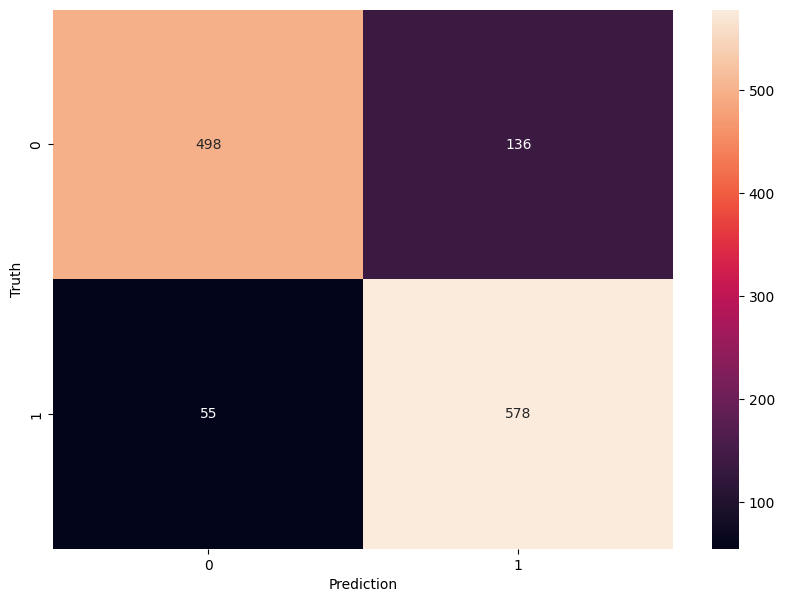

In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

**KNeighborsClassifier have better performence because we use words similraity here** 